# Sentiment Analysis

## What is Sentiment Analysis
- This is the process of examining a piece of text to determine the opinion/view of the author using algorithms sometimes called opinion mining
- Sentiment analysis can classify text into negative, positive or neutral classes depending on sentiment/opinion of the author
- Sentiment analysis is a subset of natural language processing (NLP) and NLP is a field of computer science concerned with computers being able to understand human language(natural language) with the means of artificial intelligence and machine leaning.
- Sentiment analysis can be performed using three main methods
    - **rules based approach** this method works by looking at the number of negative and positive words weighing the words if the number of positive words out weigh the negative the text is classified as positive and the inverse is true. This method is valnurable to negation though. 
    - **lexicon based** an unsupervised method which involves calculating the sentiment from the semantic orientation of word or phrases that occur in a text
    - **machine learning** method which involves training a model using a dataset with labels

### Applications of sentiment analysis
- Reputation management reputaion of your brand or company
- 

#### Today we are going to focus on implementing sentiment analysis but dont worry we are not going to build a model or anything we are just going to use a module called `textblob` its a module used for prototyping nlp solutions and it is even used in production

----

- To get started fireup these commands in terminal in your virtual enviroment 
    ````
    pip install textblob
    python -m textblob.download_corpora
    ````
- when done do the following to perform your first sentiment anaylsis task

In [10]:
from textblob import TextBlob

classifer = TextBlob('I love python its a good tool')

if classifer.sentiment.polarity > 0:
    print('Positive')
elif classifer.sentiment.polarity < 0:
    print('Negative')
else:
    print('Neutral')

Positive


#### Textblob can do much more  than just sentiment analysis that since its a library for processing text data.
##### Find More Here 👉  [TextBlob Documentation](https://textblob.readthedocs.io/en/dev/)

# Implementing Sentiment Analysis In Real World 'Twitter Data Sentiment Analysis'

- Install tweepy a python module for accessing Twitter API using
    - ` pip install tweepy `
- Apply for a twitter development account at [Twitter Developers](https:://developers.twitter.com)
- follow through this


In [11]:
import tweepy
import re
from tweepy import OAuthHandler



In [37]:
# @hidden_cell

# keys and tokens from the Twitter Dev Console 
consumer_key = 'BoDKWzyGkxBHHWVDkZQNt8l3C'
consumer_secret = 'GwNXciayGWRc2paA5IkwMJyMoXPgioW7WUss8svJRjGvNMQVIP'
access_token = '2334151503-pt38pMqJlEUWsAq73lJtn5XNMrUEg6QKTNQnjEv'
access_token_secret = 'GOeB9qPnugYombcgulxgJw2yrbsyUeH071LtD9mARykrZ'

In [12]:
# attempt authentication 
try: 
    # create OAuthHandler object 
    auth = OAuthHandler(consumer_key, consumer_secret) 
    # set access token and secret 
    auth.set_access_token(access_token, access_token_secret) 
    # create tweepy API object to fetch tweets 
    api = tweepy.API(auth) 
except: 
    print("Error: Authentication Failed")

In [13]:
## Helper Functions

def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])(\w+:\/\/\S+)", " ", tweet).split()) 
    
def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

def get_tweets(query, count = 10): 
    ''' 
    Main function to fetch tweets and parse them. 
    '''
    # empty list to store parsed tweets 
    tweets = [] 

    try: 
        # call twitter api to fetch tweets 
        fetched_tweets = api.search(q = query, count = count) 

        # parsing tweets one by one 
        for tweet in fetched_tweets: 
            # empty dictionary to store required params of a tweet 
            parsed_tweet = {} 

            # saving text of tweet 
            parsed_tweet['text'] = tweet.text 
            # saving sentiment of tweet 
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text) 

            # appending parsed tweet to tweets list 
            if tweet.retweet_count > 0: 
                # if tweet has retweets, ensure that it is appended only once 
                if parsed_tweet not in tweets: 
                    tweets.append(parsed_tweet) 
            else: 
                tweets.append(parsed_tweet) 

        # return parsed tweets 
        return tweets 

    except tweepy.TweepError as e: 
        # print error (if any) 
        print("Error : " + str(e)) 

In [32]:
tweets = get_tweets('Samsung S10 flod', 100)

positiveTweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
negativeTweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']

statistics = {
      'positiveTweets': {
        'tweets': positiveTweets,
        'percentage': len(positiveTweets)/len(tweets) * 100
      },
      'negativeTweets': {
        'tweets': negativeTweets,
        'percentage': len(negativeTweets)/len(tweets) * 100
      },
      'neutralTweets' : {
        'percentage': ((len(tweets) - len(negativeTweets) - len(negativeTweets))/len(tweets)) * 100
      }
}

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline

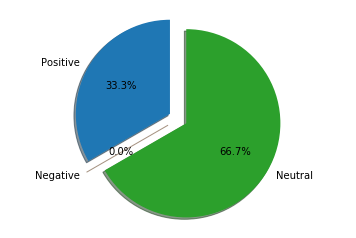

In [34]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [statistics['positiveTweets']['percentage'], statistics['negativeTweets']['percentage'], statistics['neutralTweets']['percentage']]
explode = (0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()